In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0-dev20210309


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто', 'Сандалии', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинок']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

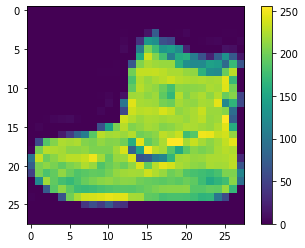

In [6]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6380 - accuracy: 0.7804
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3849 - accuracy: 0.8599
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3446 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3121 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2973 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2838 - accuracy: 0.8940
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2718 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2595 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2503 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.237

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3804 - accuracy: 0.8670


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [43]:
img = test_images[34]
imgp = (np.expand_dims(img,0))
prediction = model.predict(imgp)
print(prediction)

[[ -9.089205  -12.751604  -10.093999  -10.036993   -3.0427346 -11.112423
   -9.373879  -23.418459   19.295078  -33.579453 ]]


Text(0.5, 0, 'Сумка')

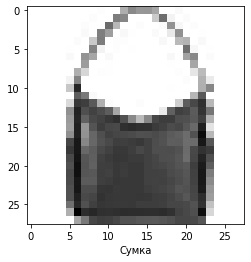

In [44]:
prd = np.argmax(prediction[0])
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.xlabel(class_names[prd])